In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('/content/train-chennai-sale (1).csv')

In [6]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


##Data Cleaning

In [7]:
ds = df

In [8]:
# Removing all the null values
ds.dropna(inplace=True)

# Renaming all the column names in lowercase letters
ds.columns = ds.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
ds.area = ds.area.str.lower()

# Correcting the spelling mistakes in area columns
ds.area = ds.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
ds.sale_cond = ds.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
ds.sale_cond = ds.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
ds.park_facil = ds.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
ds.park_facil = ds.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
ds.buildtype = ds.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
ds.buildtype = ds.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
ds.utility_avail = ds.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
ds.utility_avail = ds.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
ds.street = ds.street.str.lower()

# Correcting the spelling mistakes in street columns
ds.street = ds.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
ds.mzzone = ds.mzzone.str.lower()

# Fixing the correct ds Type of columns
ds.n_bedroom = ds.n_bedroom.astype(int)
ds.n_bathroom = ds.n_bathroom.astype(int)

# Correcting Date columnd from object to daterime format
ds.date_sale = pd.to_datetime(ds.date_sale, format='%d-%m-%Y')
ds.date_build = pd.to_datetime(ds.date_build, format='%d-%m-%Y')

# Creating property_age column which deternine how old the property id
ds['property_age'] = pd.DatetimeIndex(ds.date_sale).year - pd.DatetimeIndex(ds.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
ds['total_price'] = pd.DataFrame(ds.reg_fee	+ ds.commis	+ ds.sales_price)

# Rearranging the columns of dsframe 
ds = ds.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

ds.head(3)

,prt_id,area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,date_build,date_sale,...,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,P03210,karapakkam,abnormal,yes,commercial,allpub,paved,a,1967-05-15,2011-05-04,...,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,P09411,anna nagar,abnormal,no,commercial,allpub,gravel,rh,1995-12-22,2006-12-19,...,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,P01812,adyar,abnormal,yes,commercial,elo,gravel,rl,1992-02-09,2012-02-04,...,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408


In [9]:
#Dropping the prt_id column because it is a unique value
ds.drop('prt_id', axis=1, inplace=True)

Checking if there is a linear relationship between area and target column

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

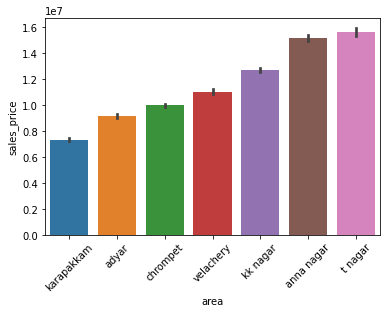

In [10]:
ds_sorted = ds.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sns.barplot(x='area',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

In [11]:
#since the relationship 
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

ds['area']= label_encoder.fit_transform(ds['area'])
  
ds['area'].unique()

array([3, 1, 0, 6, 2, 4, 5])

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

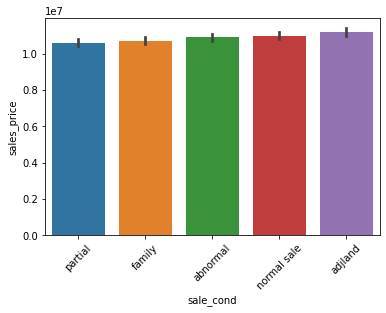

In [12]:
ds_sorted = ds.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
sns.barplot(x='sale_cond',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

There seems to be no relation with target variable.So we will be dropping the feature

In [13]:
ds.drop('sale_cond', axis=1, inplace=True)

In [14]:
ds.head()

,area,park_facil,buildtype,utility_avail,street,mzzone,date_build,date_sale,property_age,int_sqft,...,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,3,yes,commercial,allpub,paved,a,1967-05-15,2011-05-04,44,1004,...,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,1,no,commercial,allpub,gravel,rh,1995-12-22,2006-12-19,11,1986,...,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,0,yes,commercial,elo,gravel,rl,1992-02-09,2012-02-04,20,909,...,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408
3,6,no,other,nosewr,paved,i,1988-03-18,2010-03-13,22,1855,...,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290,10063653
4,3,yes,other,allpub,gravel,c,1979-10-13,2009-10-05,30,1226,...,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250,7717313


(array([   0,    1,    2, ..., 1695, 1696, 1697]),
 <a list of 1698 Text major ticklabel objects>)

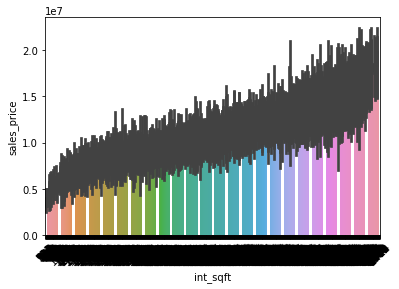

In [15]:
ds_sorted = ds.groupby('int_sqft')['sales_price'].mean().reset_index().sort_values('sales_price')['int_sqft']
sns.barplot(x='int_sqft',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

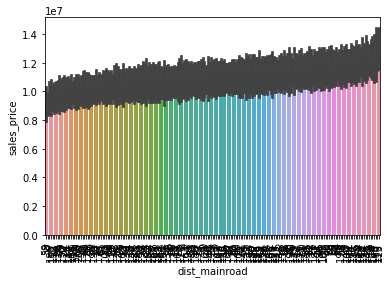

In [16]:
ds_sorted = ds.groupby('dist_mainroad')['sales_price'].mean().reset_index().sort_values('sales_price')['dist_mainroad']
sns.barplot(x='dist_mainroad',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=90)

In [44]:
ds.drop('dist_mainroad', axis=1, inplace=True)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

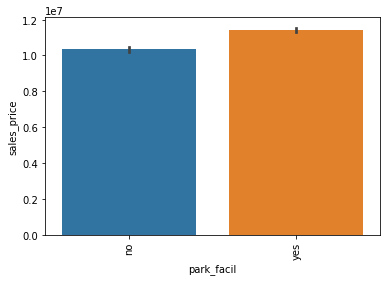

In [17]:
ds_sorted = ds.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
sns.barplot(x='park_facil',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=90)

In [18]:
label_encoder = preprocessing.LabelEncoder()
  

ds['park_facil']= label_encoder.fit_transform(ds['park_facil'])
  
ds['park_facil'].unique()

array([1, 0])

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

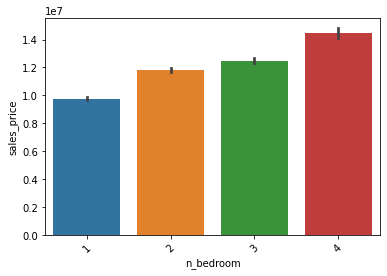

In [26]:
ds_sorted = ds.groupby('n_bedroom')['sales_price'].mean().reset_index().sort_values('sales_price')['n_bedroom']
sns.barplot(x='n_bedroom',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

Linear relationship

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

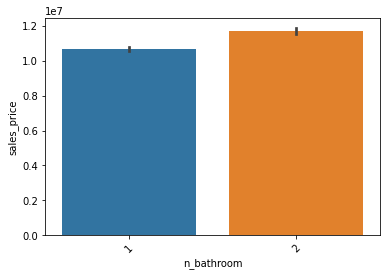

In [28]:
ds_sorted = ds.groupby('n_bathroom')['sales_price'].mean().reset_index().sort_values('sales_price')['n_bathroom']
sns.barplot(x='n_bathroom',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

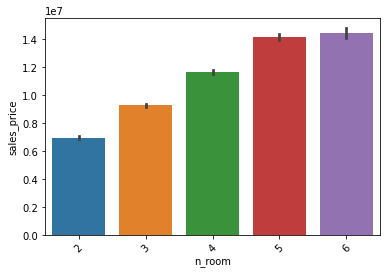

In [29]:
ds_sorted = ds.groupby('n_room')['sales_price'].mean().reset_index().sort_values('sales_price')['n_room']
sns.barplot(x='n_room',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

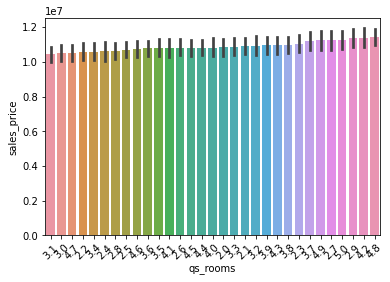

In [30]:
ds_sorted = ds.groupby('qs_rooms')['sales_price'].mean().reset_index().sort_values('sales_price')['qs_rooms']
sns.barplot(x='qs_rooms',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

We will drop qs rooms because there is no linear relationship with the target variable 

In [35]:
ds.drop('qs_rooms', axis=1, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

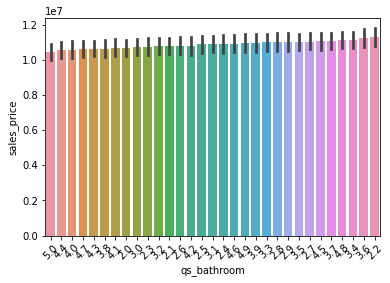

In [31]:
ds_sorted = ds.groupby('qs_bathroom')['sales_price'].mean().reset_index().sort_values('sales_price')['qs_bathroom']
sns.barplot(x='qs_bathroom',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

In [36]:
ds.drop('qs_bathroom', axis=1, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

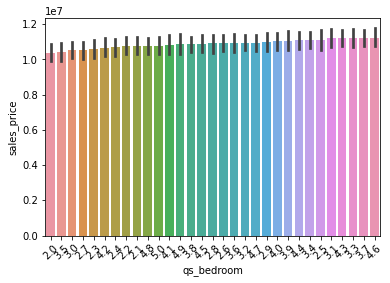

In [39]:
ds_sorted = ds.groupby('qs_bedroom')['sales_price'].mean().reset_index().sort_values('sales_price')['qs_bedroom']
sns.barplot(x='qs_bedroom',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

In [41]:
ds.drop('qs_bedroom', axis=1, inplace=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

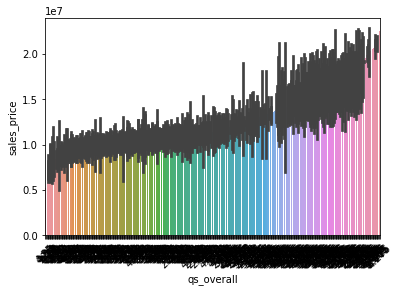

In [40]:
ds_sorted = ds.groupby('qs_overall')['sales_price'].mean().reset_index().sort_values('sales_price')['qs_overall']
sns.barplot(x='qs_overall',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

In [43]:
ds.drop('total_price', axis=1, inplace=True)

In [ ]:
ds.drop('reg_fee', axis=1, inplace=True)
ds.drop('commis', axis=1, inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

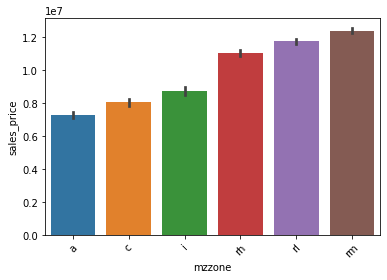

In [46]:
ds_sorted = ds.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']
sns.barplot(x='mzzone',y='sales_price',data = ds,order = ds_sorted)
plt.xticks(rotation=45)

In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7056 non-null   int64         
 1   park_facil     7056 non-null   int64         
 2   buildtype      7056 non-null   object        
 3   utility_avail  7056 non-null   object        
 4   street         7056 non-null   object        
 5   mzzone         7056 non-null   object        
 6   date_build     7056 non-null   datetime64[ns]
 7   date_sale      7056 non-null   datetime64[ns]
 8   property_age   7056 non-null   int64         
 9   int_sqft       7056 non-null   int64         
 10  n_bedroom      7056 non-null   int64         
 11  n_bathroom     7056 non-null   int64         
 12  n_room         7056 non-null   int64         
 13  qs_overall     7056 non-null   float64       
 14  sales_price    7056 non-null   int64         
dtypes: datetime64[ns](2),

In [19]:
ds.area.unique()

array([3, 1, 0, 6, 2, 4, 5])

In [20]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
area,7056.0,2.908305e+00,1.821428e+00,0.0,2.00,3.0,4.00,6.00
park_facil,7056.0,5.041100e-01,5.000185e-01,0.0,0.00,1.0,1.00,1.00
property_age,7056.0,2.427353e+01,1.233156e+01,3.0,14.00,23.0,34.00,55.00
int_sqft,7056.0,1.381317e+03,4.578609e+02,500.0,991.00,1369.5,1744.00,2500.00
dist_mainroad,7056.0,9.956916e+01,5.740387e+01,0.0,50.00,99.0,148.00,200.00
n_bedroom,7056.0,1.636621e+00,8.036325e-01,1.0,1.00,1.0,2.00,4.00
n_bathroom,7056.0,1.213152e+00,4.095631e-01,1.0,1.00,1.0,1.00,2.00
n_room,7056.0,3.686650e+00,1.020011e+00,2.0,3.00,4.0,4.00,6.00
qs_rooms,7056.0,3.517177e+00,8.921405e-01,2.0,2.70,3.5,4.30,5.00
qs_bathroom,7056.0,3.505896e+00,8.976443e-01,2.0,2.70,3.5,4.30,5.00


# Exploratory data analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7056 non-null   object        
 1   area           7056 non-null   object        
 2   int_sqft       7056 non-null   int64         
 3   date_sale      7056 non-null   datetime64[ns]
 4   dist_mainroad  7056 non-null   int64         
 5   n_bedroom      7056 non-null   int64         
 6   n_bathroom     7056 non-null   int64         
 7   n_room         7056 non-null   int64         
 8   sale_cond      7056 non-null   object        
 9   park_facil     7056 non-null   object        
 10  date_build     7056 non-null   datetime64[ns]
 11  buildtype      7056 non-null   object        
 12  utility_avail  7056 non-null   object        
 13  street         7056 non-null   object        
 14  mzzone         7056 non-null   object        
 15  qs_rooms       7056 n

In [47]:
ds.isna().sum()

area             0
park_facil       0
buildtype        0
utility_avail    0
street           0
mzzone           0
date_build       0
date_sale        0
property_age     0
int_sqft         0
n_bedroom        0
n_bathroom       0
n_room           0
qs_overall       0
sales_price      0
dtype: int64

In [48]:
ds = ds.dropna()
 
# To reset the indices
ds = ds.reset_index(drop = True)

In [49]:
ds.shape

(7056, 15)

In [50]:
# Finding out the correlation between the features
corr = ds.corr()
corr.shape

(9, 9)

# Plotting the heatmap of correlation between features

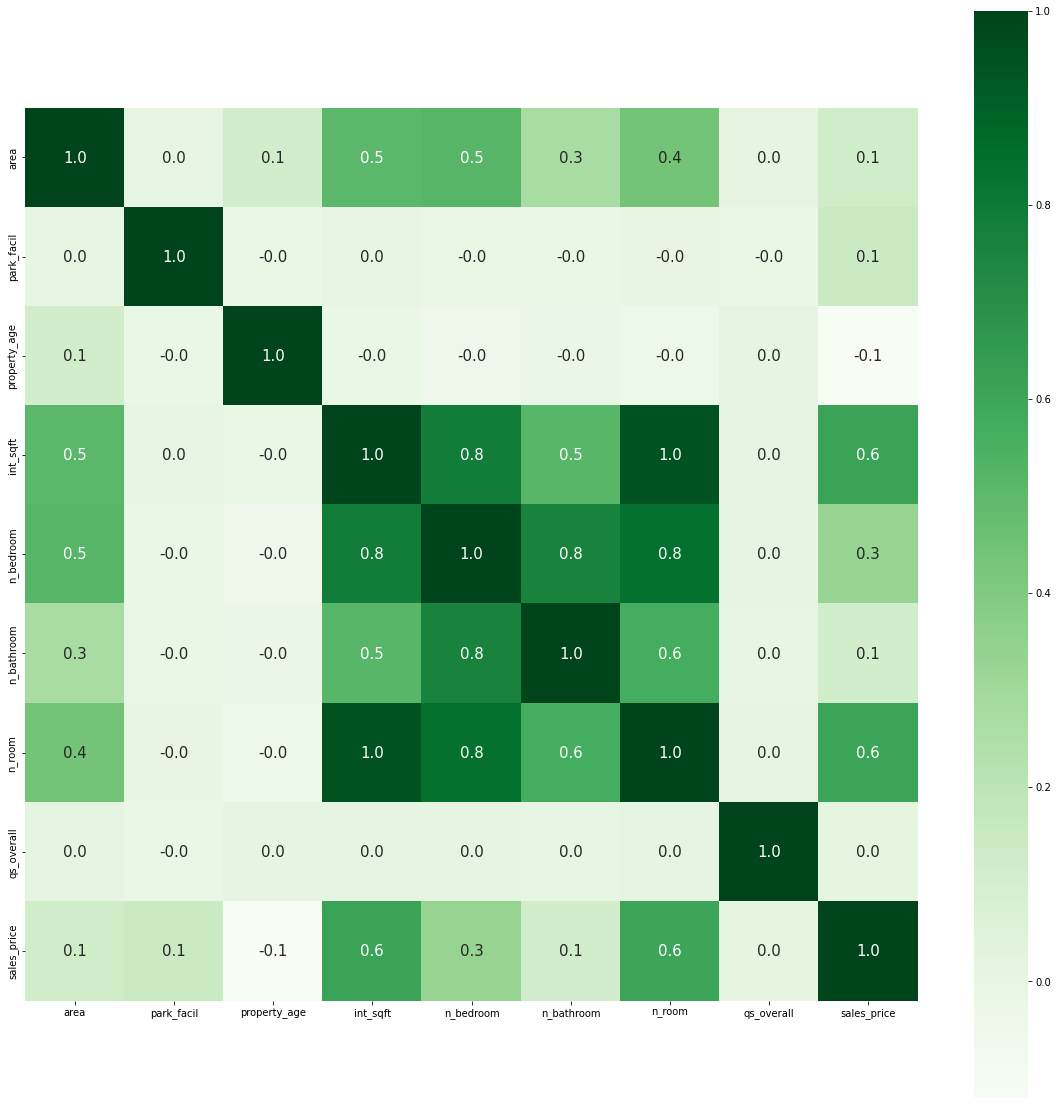

In [51]:
## Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [52]:
# View Distribution of column data
for col in list(ds.columns):
    print(ds[col].value_counts())

2    1691
3    1359
4     990
6     975
1     777
0     769
5     495
Name: area, dtype: int64
1    3557
0    3499
Name: park_facil, dtype: int64
house         2433
other         2312
commercial    2311
Name: buildtype, dtype: int64
allpub     1875
nosewa     1860
nosewr     1812
elo        1509
Name: utility_avail, dtype: int64
paved        2554
gravel       2502
no access    2000
Name: street, dtype: int64
rl    1849
rh    1808
rm    1801
c      547
a      533
i      518
Name: mzzone, dtype: int64
1987-07-02    6
1999-04-04    5
1982-01-29    4
1990-10-02    4
1982-05-13    4
             ..
1954-09-10    1
2001-02-25    1
1988-08-06    1
2005-02-19    1
1961-07-24    1
Name: date_build, Length: 5773, dtype: int64
2009-10-06    12
2010-11-17    10
2012-03-15    10
2011-04-12    10
2009-01-06    10
              ..
2006-03-05     1
2006-06-25     1
2004-09-04     1
2012-10-03     1
2005-07-13     1
Name: date_sale, Length: 2794, dtype: int64
20    208
19    208
5     203
28    200
22 

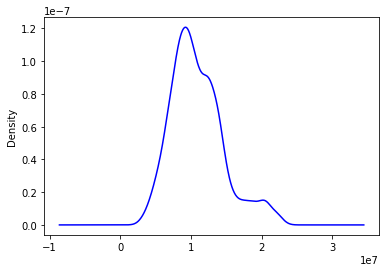

In [53]:
ds.sales_price.plot.density(color='blue')

In [54]:
# Spliting target variable and independent variables
X = ds.drop(['sales_price'], axis = 1)
y = ds['sales_price']

In [55]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [56]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 206 kB 34.3 MB/s 
     |████████████████████████████████| 2.0 MB 82.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [57]:

from flaml import AutoML
automl_log = AutoML() 

In [58]:
automl_log.fit(X_train, y_train, task="regression",metric='r2',time_budget=60,estimator_list = ['lgbm'],
          n_splits=10)

[flaml.automl: 09-11 10:30:02] {2600} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 09-11 10:30:02] {2602} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 09-11 10:30:02] {2605} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 09-11 10:30:02] {2727} INFO - Minimizing error metric: 1-r2
INFO:flaml.automl:Minimizing error metric: 1-r2
[flaml.automl: 09-11 10:30:02] {2869} INFO - List of ML learners in AutoML Run: ['lgbm']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 09-11 10:30:02] {3174} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 09-11 10:30:02] {3308} INFO - Estimated sufficient time budget=2711s. Estimated necessary time budget=3s.
INFO:flaml.automl:Estimated sufficient time budget=2711s. Estimated necessary time budget=3s.
[flaml.automl: 09-11 10:30:02] {3360} INFO -  at 0.4s,	es

In [59]:
print(1-automl_log.best_loss)

0.9945541279835975


In [60]:
# Convert the prediction in original format
test_pred_log = np.exp(automl_log.predict(X_test))-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Retreiving best configuration

In [61]:
print('Best hyperparmeter config:', automl_log.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl_log.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl_log.best_config_train_time))
print(automl_log.model.estimator)

Best hyperparmeter config: {'n_estimators': 1209, 'num_leaves': 8, 'min_child_samples': 9, 'learning_rate': 0.11290829723056903, 'log_max_bin': 9, 'colsample_bytree': 0.7178762702916114, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.06580720637877377}
Best r2 on validation data: 0.9946
Training duration of best run: 0.7113 s
LGBMRegressor(colsample_bytree=0.7178762702916114,
              learning_rate=0.11290829723056903, max_bin=511,
              min_child_samples=9, n_estimators=1209, num_leaves=8,
              reg_alpha=0.0009765625, reg_lambda=0.06580720637877377,
              verbose=-1)


Feature importance

<BarContainer object of 26 artists>

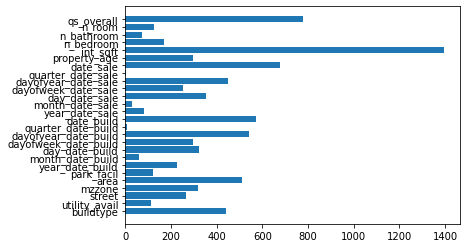

In [62]:
import matplotlib.pyplot as plt
plt.barh(automl_log.feature_names_in_, automl_log.feature_importances_)

Predictions

In [63]:
y_pred = automl_log.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [ 7303145.81250053  9125226.27994695 11633581.10050685 ...
 13743755.3310813  12277118.99023428 20351050.85826937]


Calculating different metrics

In [64]:
from flaml.ml import sklearn_metric_loss_score
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))


r2 = 0.9950636925378414
